In [ ]:
import tensorflow as tf
import pandas as pd
from ydata_profiling import ProfileReport

import sweetviz as sv

import dtale

In [ ]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Reshape data for EDA (flatten 28x28 images into 784 features)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


# # Convert to DataFrame for easier analysis
train_df = pd.DataFrame(x_train)
train_df['label'] = y_train

test_df = pd.DataFrame(x_test)
test_df['label'] = y_test

In [ ]:
profile = ProfileReport(
    train_df.sample(200),
    title="Fashion MNIST Training Data Report",
    explorative=True,
    correlations=None,  # Disable correlation calculations
    interactions=None,  # Disable interaction calculations
)
profile.to_file("fashion_mnist_eda_report.html")

Summarize dataset: 100%|█████████▉| 790/793 [00:13<00:00, 92.03it/s, Detecting duplicates]     c:\Users\hemam\miniconda3\envs\mlops\lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:37: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\hemam\miniconda3\envs\mlops\lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:37: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\hemam\miniconda3\envs\mlops\lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:37: PerformanceWarning:


2025-03-11 07:27:05,430 - INFO     - Executing shutdown due to inactivity...
2025-03-11 07:27:17,764 - INFO     - Executing shutdown...
2025-03-11 07:27:17,768 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [ ]:
# Example: train_df should have 784 features and 1 label column
print(train_df.shape)  # Should output (60000, 785)
print(train_df.columns)  # Should show columns like 0, 1, ..., 783, 'label'

(60000, 785)
Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783, 'label'],
      dtype='object', length=785)


Feature: 6                                   |          | [  1%]   02:28 -> (4:35:56 left)
Feature: 5                                   |          | [  1%]   00:00 -> (01:34 left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

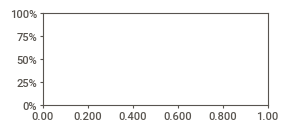

Feature: 5                                   |          | [  1%]   00:14 -> (01:34 left)

In [12]:
# Analyze a smaller subset of the data
report = sv.analyze(train_df.sample(1000), pairwise_analysis='on')
report.show_html("fashion_mnist_eda_report.html")

In [ ]:


# Launch D-Tale for the training data
dtale.show(train_df).open_browser()